[721.00813647  51.28899505  17.83965045   8.84934101]
[1023.43850537   45.5852456    28.05245883   15.79539489]


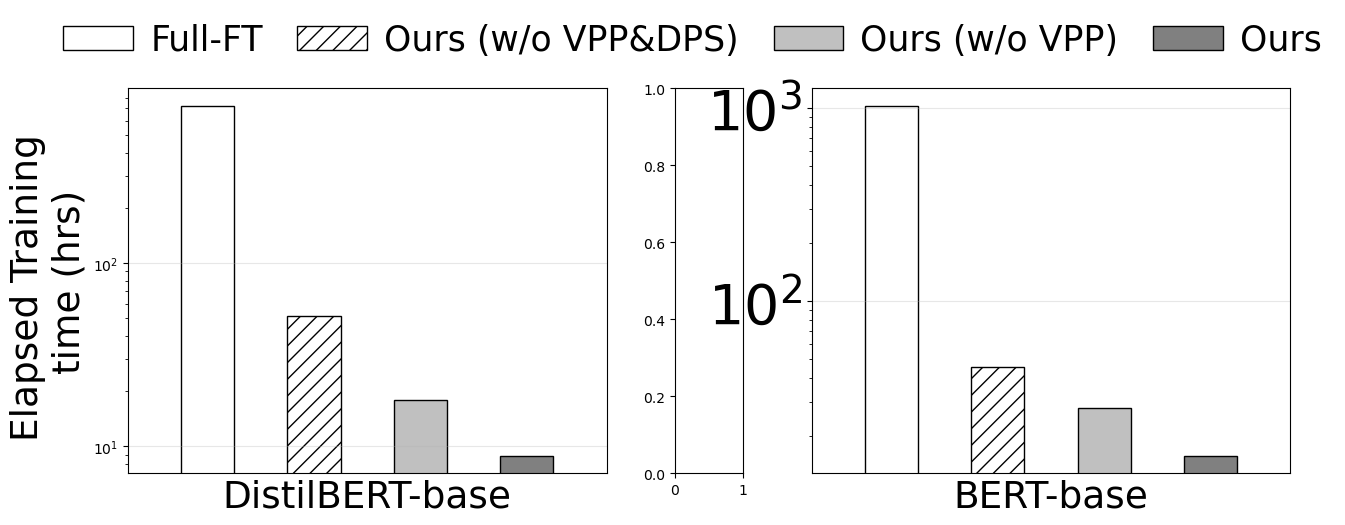

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# peak memory
# ['full', 'adapter', 'bitfit', 'inference']
# {"BERT-large", "BERT-base", "DistilBERT-base", "ALBERT-base"}
memory = {"1": np.array([721.0081364746094, 51.288995052734414, 17.839650453124996, 8.84934100644531]),  
           '2':np.array([1023.4385053710938, 45.58524559570315, 28.052458828125, 15.795394888671876])}
fig_output_path = "./"

def plot_memory(model):
    """
        todo
    """
    label_font_conf = {
        # "weight": "bold",
        "size": "27"
    }
    bar_confs = {
        "color": ["white", "white", "silver","grey"],
        "linewidth": 1,
        "hatch": ["", "//", "", ""],
        "edgecolor": "black",
    }


    figure_mosaic = """
    AAAA,BBBB
    """
    fig, axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(15, 5), dpi=100)
    bar_width = 0.01

    x = [0.1, 0.1+bar_width*2, 0.1+bar_width*4, 0.1+bar_width*6]

    xlabels = ["1",'2']
    xlabels_fig = ["DistilBERT-base", "BERT-base"]
    ax = [axes["A"],axes['B']]
    
    for i in range(2):
        # ax[i].set_xlabel(xlabels_fig[i], **label_font_conf)
        ax[i].set_xticks([])
        fps = memory[xlabels[i]]
        print(fps)
        ax[i].bar(x, fps, width=bar_width, **bar_confs)
        ax[i].set_xlabel(xlabels_fig[i], **label_font_conf)
        if i == 0:
            ax[i].set_ylabel('Elapsed Training \ntime (hrs)',**label_font_conf)
        ax[i].set_yscale('log')
        plt.yticks(fontsize=40)
        ax[i].grid(axis="y", alpha=0.3)
        ax[i].set_xlim(min(x)-bar_width*1.5, max(x)+bar_width*1.5)
    
    bars = ax[0].containers[0].get_children()

    labels = ['Full-FT', 'Ours (w/o VPP&DPS)', 'Ours (w/o VPP)', 'Ours']
    ax[0].legend(bars, labels, ncol=4, loc="lower left", bbox_to_anchor=(-0.2, 1),frameon=False,fontsize=25,columnspacing = 1,labelspacing=1.5,handletextpad=0.5)

    plt.subplots_adjust(wspace=1)
    
    # plt.savefig('../../figs/eval_ablation_new-cdq.pdf', bbox_inches="tight")
    plt.show()


if __name__ == '__main__':
    plot_memory("")

In [7]:
[m[2]/m[3] for m in memory.values()]

[2.0159298234898735, 1.775989712561326]